# Import libraries needed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Import the dataset

In [4]:
#Load the dataset
df = pd.read_excel('superstoresales.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#Parse dates of order date in the dataset
df = pd.read_csv('superstore.csv',parse_dates=['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#Check for missing values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#Check the different types of product categories included
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#Now we create a dataframe which includes only data related to furniture sales. 
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,22-03-15,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-05-12,10-12-16,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-06-09,09-09-15,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,23-01-14,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [9]:
#Know the earliest date recorded
furniture['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [10]:
#Know the most recent date recorded
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [11]:
#Now we can remove unnecessary columns from the furniture dataframe
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-08-11,261.9600
1,2016-08-11,731.9400
3,2015-11-10,957.5775
5,2014-09-06,48.8600
10,2014-09-06,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-05-12,13.4000
9980,2015-06-09,85.9800
9989,2014-01-21,25.2480


In [12]:
#Now let's sort furniture datframe according to order date
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7948,2014-01-03,362.250
7949,2014-01-03,63.552
8310,2014-01-03,376.509
6547,2014-01-03,634.116
157,2014-01-03,457.568
...,...,...
5457,2017-12-29,68.460
5131,2017-12-29,101.120
1877,2017-12-29,393.568
7635,2017-12-29,300.980


In [13]:
#Now let's find how much total furniture sales occurred on each date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [14]:
furniture

,Order Date,Sales
0,2014-01-03,1893.9950
1,2014-01-06,2024.0600
2,2014-01-08,44.1280
3,2014-01-11,100.3840
4,2014-01-12,4513.6060
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [15]:
#Now let's set the Order date column as the index column
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-03,1893.9950
2014-01-06,2024.0600
2014-01-08,44.1280
2014-01-11,100.3840
2014-01-12,4513.6060
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [16]:
#Now let's see whether there is any frequency in the dataframe
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-06', '2014-01-08', '2014-01-11',
               '2014-01-12', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [17]:
#Now let's resample the data into means of monthly sales of furniture and save this into a new variable called Order date
y_furniture = furniture['Sales'].resample('MS').mean()
y_furniture

Order Date
2014-01-01     864.733571
2014-02-01     248.475714
2014-03-01     800.669889
2014-04-01     525.167692
2014-05-01     390.457467
2014-06-01     611.823918
2014-07-01     601.328500
2014-08-01     729.417324
2014-09-01     844.152147
2014-10-01     818.771824
2014-11-01    1002.974167
2014-12-01    1381.955123
2015-01-01    1463.433262
2015-02-01     894.442556
2015-03-01     758.632233
2015-04-01     674.616300
2015-05-01     696.332806
2015-06-01     462.345456
2015-07-01     733.396412
2015-08-01     906.556600
2015-09-01    1513.551000
2015-10-01     731.694267
2015-11-01     866.242826
2015-12-01     730.189160
2016-01-01     613.566267
2016-02-01     574.572846
2016-03-01     797.139957
2016-04-01     585.658150
2016-05-01    1188.071411
2016-06-01     700.584200
2016-07-01     742.909176
2016-08-01     971.386409
2016-09-01     874.372423
2016-10-01     680.867550
2016-11-01     983.663476
2016-12-01    1275.715521
2017-01-01     925.827053
2017-02-01    1049.935400
2

In [18]:
#Now let's check the monthly sales value happened in year 2017
print(y_furniture['2017':])

Order Date
2017-01-01     925.827053
2017-02-01    1049.935400
2017-03-01     621.655512
2017-04-01     557.245886
2017-05-01     539.623495
2017-06-01     771.083705
2017-07-01     638.451841
2017-08-01     965.216000
2017-09-01     996.806227
2017-10-01     753.598800
2017-11-01    1242.404375
2017-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64


In [19]:
office= df.loc[df['Category'] == 'Office Supplies']
office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-12-06,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,28-09-16,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,23-05-15,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,23-05-15,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [20]:
office['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [21]:
office['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [22]:
office.drop(cols,axis=1,inplace=True)
office

,Order Date,Sales
2,2016-12-06,14.620
4,2015-11-10,22.368
6,2014-09-06,7.280
8,2014-09-06,18.504
9,2014-09-06,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [23]:
office= office.sort_values('Order Date')
office

,Order Date,Sales
7947,2014-01-03,18.840
7950,2014-01-03,129.552
8309,2014-01-03,137.352
6548,2014-01-03,17.472
1373,2014-01-04,17.088
...,...,...
1297,2017-12-30,20.720
645,2017-12-30,209.300
5091,2017-12-30,3.024
908,2017-12-30,52.776


In [24]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office

,Order Date,Sales
0,2014-01-03,303.216
1,2014-01-04,119.888
2,2014-01-06,2282.530
3,2014-01-07,25.104
4,2014-01-08,184.200
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [25]:
office = office.set_index('Order Date')
office

,Sales
Order Date,
2014-01-03,303.216
2014-01-04,119.888
2014-01-06,2282.530
2014-01-07,25.104
2014-01-08,184.200
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [26]:
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-12', '2014-01-13',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [27]:
y_office = office['Sales'].resample('MS').mean()
y_office

Order Date
2014-01-01     444.576632
2014-02-01     218.499545
2014-03-01     296.721840
2014-04-01     352.387750
2014-05-01     703.816174
2014-06-01     485.924773
2014-07-01     732.476455
2014-08-01     456.257947
2014-09-01     988.528962
2014-10-01     339.506087
2014-11-01     911.112280
2014-12-01     639.018000
2015-01-01     222.152933
2015-02-01     324.928500
2015-03-01     757.798478
2015-04-01     526.138250
2015-05-01     425.812846
2015-06-01     576.782105
2015-07-01     283.565773
2015-08-01     558.972591
2015-09-01     646.302731
2015-10-01     495.142125
2015-11-01     758.894040
2015-12-01     336.906966
2016-01-01     814.272800
2016-02-01     424.120429
2016-03-01     836.868480
2016-04-01     400.754680
2016-05-01     589.394679
2016-06-01     452.652760
2016-07-01     543.572435
2016-08-01     451.287640
2016-09-01     565.403958
2016-10-01     879.312522
2016-11-01     603.144000
2016-12-01    1028.002462
2017-01-01     958.909120
2017-02-01     669.431318
2

In [28]:
print(y_office['2017':])

Order Date
2017-01-01     958.909120
2017-02-01     669.431318
2017-03-01     661.838714
2017-04-01     395.856200
2017-05-01     555.389769
2017-06-01     583.356154
2017-07-01     571.286040
2017-08-01    1387.569846
2017-09-01     998.474643
2017-10-01     854.620462
2017-11-01    1036.528154
2017-12-01     781.269786
Freq: MS, Name: Sales, dtype: float64


In [29]:
technology = df.loc[df['Category'] == 'Technology']
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-09-06,14-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,01-09-14,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,20-01-16,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-08-12,10-12-16,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,28-09-16,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,03-10-16,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,21-11-17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,21-11-17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [30]:
technology['Order Date'].min()

Timestamp('2014-01-02 00:00:00')

In [31]:
technology['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [32]:
technology.drop(cols,axis=1,inplace=True)
technology

,Order Date,Sales
7,2014-09-06,907.152
11,2014-09-06,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-08-12,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [33]:
technology = technology.sort_values('Order Date')
technology

,Order Date,Sales
540,2014-01-02,468.900
5713,2014-01-03,5.940
2201,2014-01-06,881.930
1318,2014-01-07,575.920
8242,2014-01-09,357.000
...,...,...
9376,2017-12-25,31.800
2569,2017-12-27,164.388
573,2017-12-28,14.850
1878,2017-12-29,302.376


In [34]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology

,Order Date,Sales
0,2014-01-02,468.900
1,2014-01-03,5.940
2,2014-01-06,881.930
3,2014-01-07,575.920
4,2014-01-09,357.000
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [35]:
technology = technology.set_index('Order Date')
technology

,Sales
Order Date,
2014-01-02,468.900
2014-01-03,5.940
2014-01-06,881.930
2014-01-07,575.920
2014-01-09,357.000
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [36]:
technology.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-09', '2014-01-11', '2014-01-12', '2014-01-13',
               '2014-01-15', '2014-01-16',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [37]:
y_technology = technology['Sales'].resample('MS').mean()
y_technology

Order Date
2014-01-01     700.040000
2014-02-01     476.676000
2014-03-01    2060.737625
2014-04-01     942.553000
2014-05-01     399.747368
2014-06-01     546.378600
2014-07-01     600.016167
2014-08-01    1291.196308
2014-09-01    1433.504706
2014-10-01     855.612400
2014-11-01     953.516091
2014-12-01    1355.059200
2015-01-01     873.807500
2015-02-01     620.877818
2015-03-01     515.361368
2015-04-01     956.900375
2015-05-01     610.715833
2015-06-01     638.741333
2015-07-01     716.013571
2015-08-01    1613.252133
2015-09-01    1134.077000
2015-10-01     611.083333
2015-11-01     538.016955
2015-12-01    1382.932190
2016-01-01     837.282267
2016-02-01    3651.381556
2016-03-01     575.339667
2016-04-01    1173.012400
2016-05-01    1522.818471
2016-06-01     903.519000
2016-07-01     980.098500
2016-08-01     635.795500
2016-09-01     458.962700
2016-10-01    1083.918294
2016-11-01    1326.039478
2016-12-01     821.522053
2017-01-01    1219.519421
2017-02-01     972.896526
2

# Plotting the sales data for each categories

<AxesSubplot:xlabel='Order Date'>

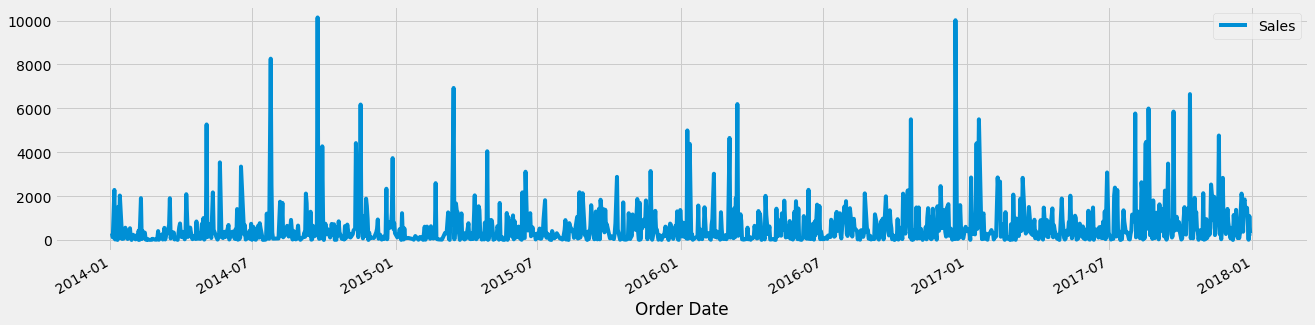

In [38]:
office.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

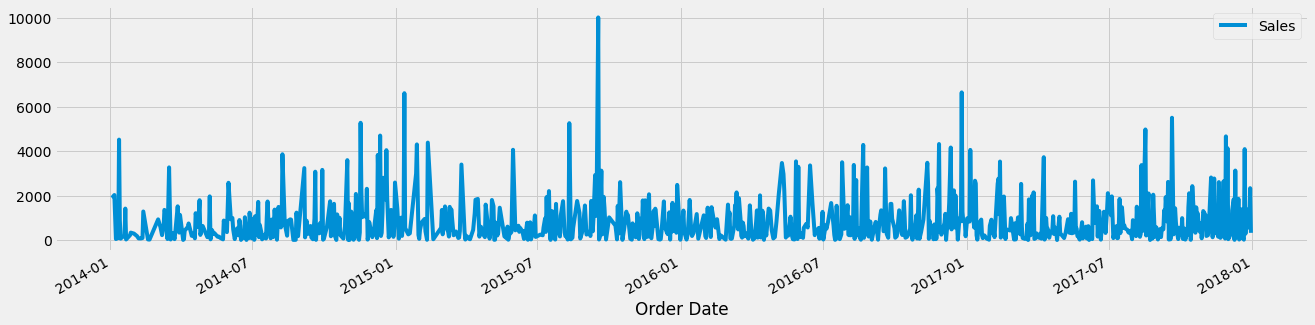

In [39]:
furniture.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

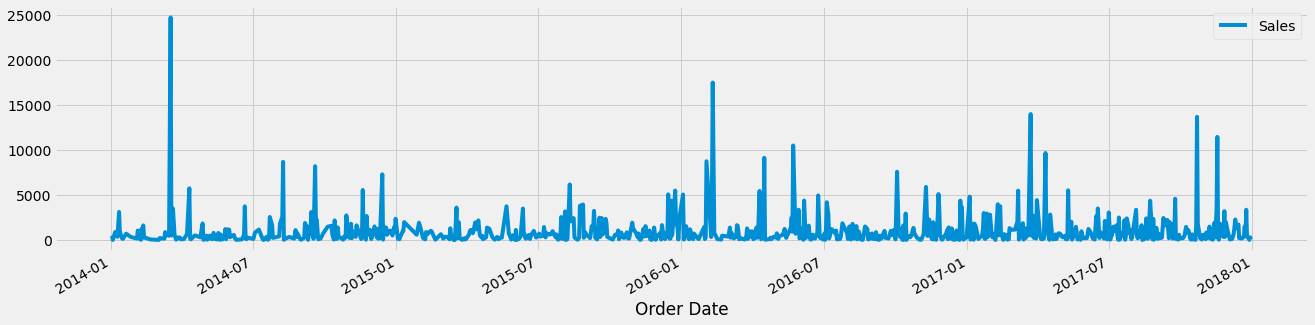

In [40]:
technology.plot(figsize=(20,5))

# Plotting the mean sales data for each categories

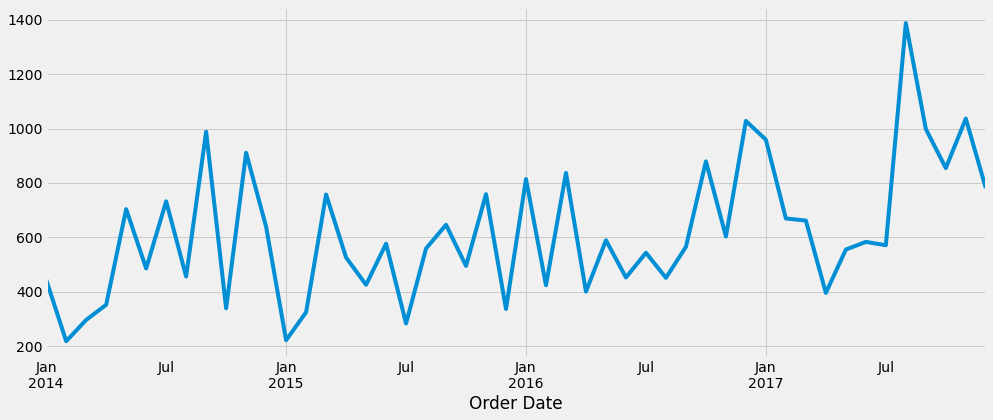

In [41]:
y_office.plot(figsize=(15,6))
plt.show()

<AxesSubplot:xlabel='Order Date'>

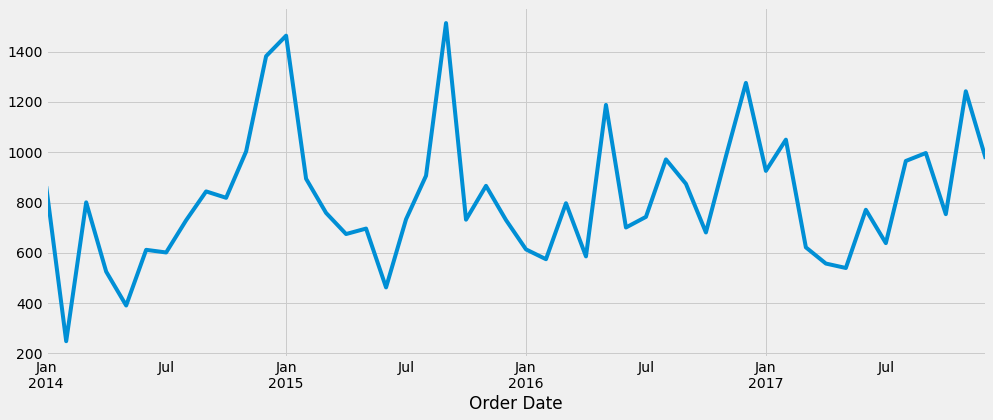

In [42]:
y_furniture.plot(figsize=(15,6))

<AxesSubplot:xlabel='Order Date'>

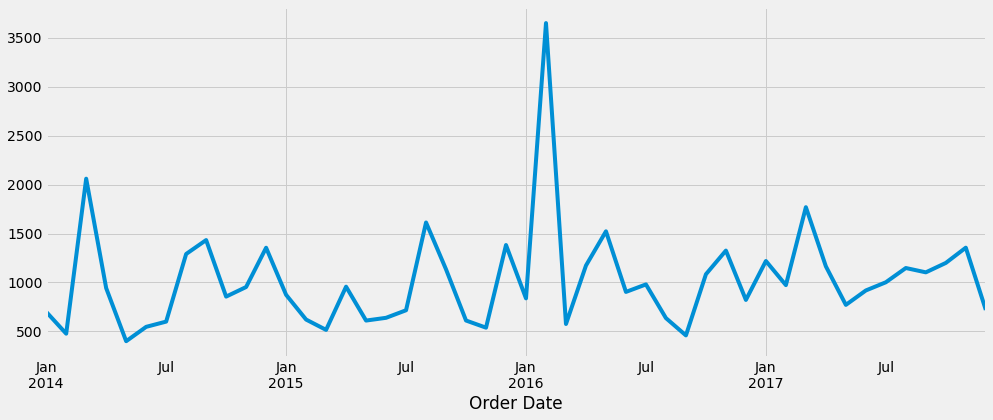

In [43]:
y_technology.plot(figsize=(15,6))

# Perform ets decomposition

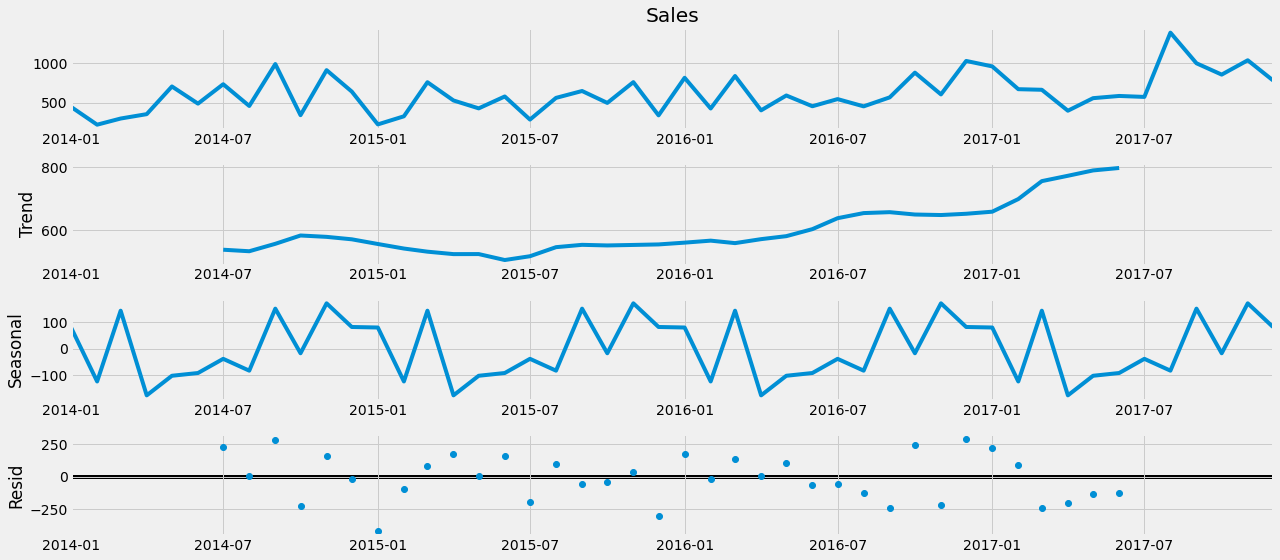

In [45]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition = sm.tsa.seasonal_decompose(y_office,model='additive')
fig = decomposition.plot()
plt.show()